In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sts
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
import scipy.optimize as opt

In [195]:
"""Reading manipulating file with country name
and returning a dataframe and transpose of the dataframe as return"""
def dataFrame(file_name, col, value1,countries):
    # Reading Data for dataframe
    df = pd.read_csv(file_name, skiprows = 4)
    # Grouping data with col value
    df1 = df.groupby(col, group_keys = True)
    #retriving the data with the all the group element
    df1 = df1.get_group(value1)
    #Reseting the index of the dataframe
    df1 = df1.reset_index()
    #Storing the column data in a variable
    a = df1['Country Name']
    # cropping the data from dataframe
    df1 = df1.iloc[countries,3:]
    df1 = df1.drop(columns=['Indicator Name', 'Indicator Code'])
    df1.insert(loc=0, column='Country Name', value=a)
    #Dropping the NAN values from dataframe Column wise
    df1= df1.dropna(axis = 1)
    #transposing the index of the dataframe
    df2 = df1.set_index('Country Name').T
    #returning the normal dataframe and transposed dataframe
    return df1, df2

In [196]:
# years using for the data analysis

# countries which are using for data analysis
countries = [35,40,55,81,109,119]
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
ele_con_c, ele_con_y = dataFrame("API_19_DS2_en_csv_v2_4700503.csv",
                                       "Indicator Name", "Electric power consumption (kWh per capita)",
                                       countries)

In [197]:

ele_con_y

Country Name,Canada,China,Germany,United Kingdom,India,Japan
1971,9166.683666,151.989347,4064.454716,4254.652412,97.772718,3415.688241
1972,9803.558419,163.911929,4335.769625,4372.636946,100.305074,3737.265366
1973,10241.920858,175.933737,4654.985048,4671.718297,100.632154,4067.364567
1974,10804.600795,174.233354,4803.423204,4534.254275,103.992658,3967.084839
1975,10466.582625,199.039715,4743.944833,4492.421629,114.558928,4041.918744
1976,11075.954225,204.030365,5146.932578,4587.688515,124.123692,4310.467746
1977,11797.262588,220.657053,5285.260786,4668.423169,126.256734,4444.420051
1978,12269.019296,246.555772,5574.745217,4729.849387,135.917641,4669.497794
1979,12422.761126,267.374265,5786.127216,4922.915733,135.741774,4861.920787
1980,12803.975515,281.624687,5797.499753,4683.932739,141.707702,4716.677939


In [198]:
x = ele_con_y.values #returns a numpy array
x

array([[ 9166.6836657 ,   151.98934735,  4064.45471612,  4254.65241185,
           97.77271821,  3415.68824092],
       [ 9803.55841896,   163.91192882,  4335.76962475,  4372.63694645,
          100.30507381,  3737.26536553],
       [10241.92085845,   175.93373699,  4654.98504839,  4671.71829741,
          100.63215413,  4067.36456714],
       [10804.60079545,   174.2333537 ,  4803.42320359,  4534.25427513,
          103.99265792,  3967.08483869],
       [10466.58262497,   199.03971541,  4743.9448331 ,  4492.42162851,
          114.55892759,  4041.91874378],
       [11075.9542253 ,   204.03036473,  5146.93257779,  4587.68851502,
          124.12369156,  4310.46774551],
       [11797.26258831,   220.65705307,  5285.26078632,  4668.423169  ,
          126.25673396,  4444.42005058],
       [12269.01929596,   246.55577228,  5574.74521659,  4729.84938707,
          135.91764067,  4669.49779398],
       [12422.76112631,   267.37426535,  5786.12721572,  4922.9157328 ,
          135.74177375, 

In [199]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)


In [200]:
normalized_df

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.078645,0.003177,0.084343,0.058514,0.003583,0.060740
2,0.132777,0.006380,0.183576,0.206844,0.004046,0.123089
3,0.202261,0.005926,0.229720,0.138669,0.008801,0.104148
4,0.160520,0.012536,0.211231,0.117922,0.023751,0.118283
5,0.235769,0.013865,0.336506,0.165169,0.037285,0.169007
6,0.324841,0.018295,0.379507,0.205210,0.040303,0.194308
7,0.383096,0.025195,0.469498,0.235674,0.053973,0.236821
8,0.402082,0.030742,0.535210,0.331425,0.053724,0.273166
9,0.449156,0.034539,0.538745,0.212902,0.062165,0.245732


In [201]:
wcss = []
y=normalized_df.values

y

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.07864542, 0.00317654, 0.08434265, 0.05851445, 0.00358313,
        0.06073982],
       [0.13277725, 0.00637951, 0.18357595, 0.20684389, 0.00404593,
        0.12308931],
       [0.20226061, 0.00592648, 0.22972037, 0.13866859, 0.00880084,
        0.10414837],
       [0.16051994, 0.01253564, 0.21123055, 0.11792168, 0.02375148,
        0.11828307],
       [0.23576908, 0.0138653 , 0.33650584, 0.16516931, 0.03728505,
        0.16900689],
       [0.32484091, 0.01829515, 0.37950741, 0.20520967, 0.04030318,
        0.19430794],
       [0.38309648, 0.02519535, 0.46949835, 0.23567402, 0.05397279,
        0.23682086],
       [0.40208152, 0.03074203, 0.53520988, 0.3314253 , 0.05372394,
        0.27316592],
       [0.44915634, 0.03453877, 0.53874522, 0.21290165, 0.06216538,
        0.2457323 ],
       [0.50292645, 0.03565594, 0.54949035, 0.15786165, 0.07655724,
        0.2527538 ],
       [0.47102618, 0

In [202]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)
    
wcss


C:\Users\Puneet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[22.09433236813028,
 7.645132899311902,
 4.360735632177284,
 2.650913222376631,
 1.6564602450149677,
 1.2097683194571656,
 0.8962577385962236,
 0.7474378516332243,
 0.6391149773937828]

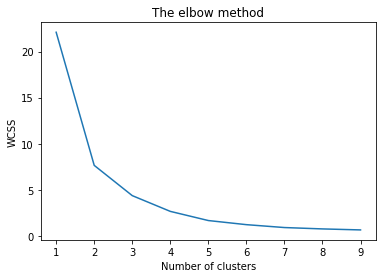

In [203]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [229]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(normalized_df)

C:\Users\Puneet\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [230]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4])

In [231]:
lables = kmeans.fit_predict(normalized_df)
centroids= kmeans.cluster_centers_

C:\Users\Puneet\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [232]:
centroids

array([[0.16211617, 0.00859694, 0.20355468, 0.12747537, 0.01682423,
        0.10993934, 3.        ],
       [0.94074948, 0.33418208, 0.86475583, 0.89865745, 0.47918381,
        0.91419954, 1.        ],
       [0.87683194, 0.1134434 , 0.76712297, 0.55255669, 0.27123946,
        0.63306756, 4.        ],
       [0.53836268, 0.04204452, 0.6015808 , 0.22182189, 0.09336913,
        0.28855851, 0.        ],
       [0.78292148, 0.84673372, 0.95846229, 0.601528  , 0.85864554,
        0.88230419, 2.        ]])

In [233]:
ele_con_y['lables']=lables
ele_con_y


Country Name,Canada,China,Germany,United Kingdom,India,Japan,lables
1971,9166.683666,151.989347,4064.454716,4254.652412,97.772718,3415.688241,0
1972,9803.558419,163.911929,4335.769625,4372.636946,100.305074,3737.265366,0
1973,10241.920858,175.933737,4654.985048,4671.718297,100.632154,4067.364567,0
1974,10804.600795,174.233354,4803.423204,4534.254275,103.992658,3967.084839,0
1975,10466.582625,199.039715,4743.944833,4492.421629,114.558928,4041.918744,0
1976,11075.954225,204.030365,5146.932578,4587.688515,124.123692,4310.467746,0
1977,11797.262588,220.657053,5285.260786,4668.423169,126.256734,4444.420051,0
1978,12269.019296,246.555772,5574.745217,4729.849387,135.917641,4669.497794,3
1979,12422.761126,267.374265,5786.127216,4922.915733,135.741774,4861.920787,3
1980,12803.975515,281.624687,5797.499753,4683.932739,141.707702,4716.677939,3


In [234]:
normalized_df.values[y_kmeans == 0, 1]

array([0.        , 0.00317654, 0.00637951, 0.00592648, 0.01253564,
       0.0138653 , 0.01829515])

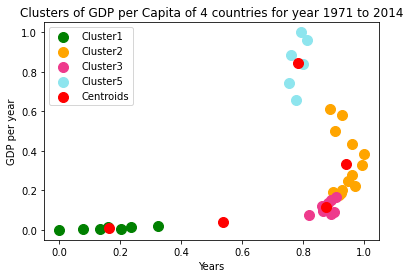

In [235]:
plt.figure()
#Ploting cluster 1
plt.scatter(normalized_df.values[lables == 0, 0], normalized_df.values[lables == 0, 1], s = 100, c = 'green', label = 'Cluster1')
#Ploting cluster 2
plt.scatter(normalized_df.values[lables == 1, 0], normalized_df.values[lables == 1, 1], s = 100, c = 'orange', label = 'Cluster2')
#Ploting cluster 3
plt.scatter(normalized_df.values[lables == 2, 0], normalized_df.values[lables == 2, 1], s = 100, c = '#EE3A8C', label = 'Cluster3')
#Ploting cluster 4
#lt.scatter(normalized_df.values[lables == 3, 0], normalized_df.values[lables == 3, 1], s = 100, c = '#43CD80', label = 'Cluster4')
#Ploting cluster 5
plt.scatter(normalized_df.values[lables == 4, 0], normalized_df.values[lables == 4, 1], s = 100, c = '#8EE5EE', label = 'Cluster5')
#Ploting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')

plt.legend()
# Title of the  plot
plt.title('Clusters of GDP per Capita of 4 countries for year 1971 to 2014')
plt.xlabel('Years')
plt.ylabel('GDP per year')
plt.show()



In [211]:
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
countries = [35,40,55,81,109]
school_c, school_y = dataFrame("API_19_DS2_en_csv_v2_4700503.csv",
                                       "Indicator Name", "School enrollment, primary and secondary (gross), gender parity index (GPI)",countries)
school_y['years'] = school_y.index

In [212]:
school_y

Country Name,Canada,China,Germany,United Kingdom,India,years
2007,0.98591,0.99155,0.98008,1.01287,0.94256,2007
2008,0.98632,0.99697,0.97805,1.00748,0.96705,2008
2009,0.98797,1.00335,0.96033,1.00484,0.98997,2009
2010,0.98954,0.98895,0.96125,0.99955,0.98905,2010
2011,0.99223,0.99242,0.96001,1.00344,0.99853,2011
2012,1.00368,0.99718,0.96137,0.99975,1.00340,2012
2013,1.00639,1.00609,0.96446,1.02419,1.07250,2013
2014,1.00857,1.00948,0.96531,1.02166,1.06962,2014
2015,1.00839,1.01158,0.96611,1.01641,1.07018,2015
2017,1.00546,1.01322,0.95765,1.01539,1.08402,2017


<AxesSubplot:>

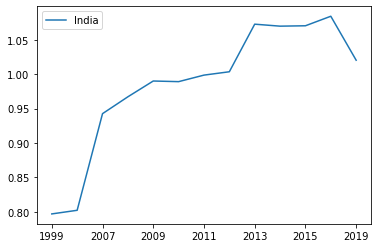

In [109]:
school_y.plot(y='India',use_index=True)

In [110]:
def exponential(t, n0, g):
    """Calculates exponential function with scale factor n0 and growth rate g."""
    t = t - 1960.0
    f = n0 * np.exp(g*t)
    return f

In [111]:
print(type(school_y["years"].iloc[1]))
school_y["years"] = pd.to_numeric(school_y["years"])
print(type(school_y["years"].iloc[1]))
param, covar = opt.curve_fit(exponential, school_y["years"], school_y["India"],
p0=(73233967692.102798, 0.03))

<class 'str'>
<class 'numpy.int64'>


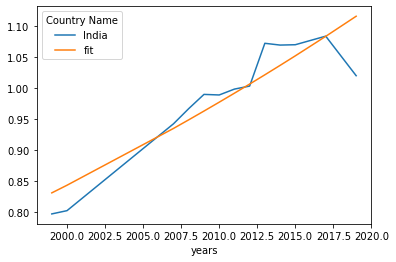

In [112]:
school_y["fit"] = exponential(school_y["years"], *param)
school_y.plot("years", ["India", "fit"])
plt.show()

In [154]:
def logistic(t, n0, g, t0):
    """Calculates the logistic function with scale factor n0 and growth rate g"""
    f = n0 / (1 + np.exp(-g*(t - t0)))
    return f

In [164]:
param, covar = opt.curve_fit(logistic, school_y["years"], school_y["India"],
p0=(3e12, 0.03, 2000.0), maxfev=5000)

parameters: [1.11920966e+00 1.16037281e-01 1.99167434e+03]
std. dev. [0.05231983 0.03418205 1.59316328]


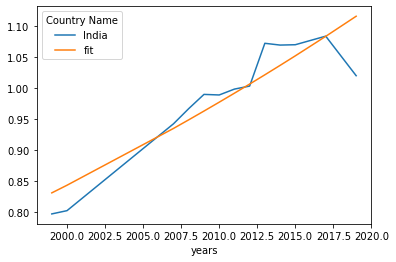

In [165]:
sigma = np.sqrt(np.diag(covar))
igma = np.sqrt(np.diag(covar))
print("parameters:", param)
print("std. dev.", sigma)
school_y["logistic function fit"] = logistic(school_y["India"], *param)
school_y.plot("years", ["India", "fit"])
plt.show()

In [166]:
year = np.arange(1960, 2035)
print(year)
forecast = logistic(year, *param)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034]


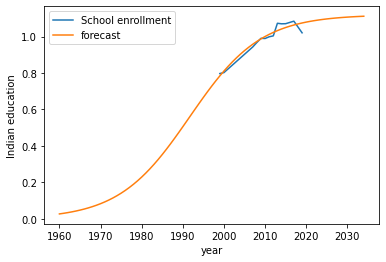

In [169]:
plt.figure()
plt.plot(school_y["years"], school_y["India"], label="School enrollment")
plt.plot(year, forecast, label="forecast")
plt.xlabel("year")
plt.ylabel("Indian education")
plt.legend()
plt.show()